#**1. Import Drive:**

In [ ]:
from google.colab import drive

In [ ]:
#drive mount:
drive.mount('/content/drive/')

# **2. Import Libraries**

In [1]:
#importing Basic libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

import warnings
warnings.filterwarnings("ignore")


Read data set using Pandas

In [2]:
data = pd.read_csv("customer_data.csv")

# **3. Exploratory Data Analysis**

In [3]:
#data head
data.head(5)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,Female,36,62,no,no,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,Female,39,149,no,no,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,Female,65,126,no,no,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,Female,24,131,no,yes,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,Female,40,191,no,no,243.00,10.9,27.54,83,7,3.0,1,0.0


In [4]:
data.tail(10)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
1990,2015,993714,364-1969,Male,32,61,no,no,67.50,9.8,7.65,94,6,3.0,2,0.0
1991,2015,993815,387-5891,Male,49,50,yes,yes,460.65,8.0,52.21,109,3,3.0,0,0.0
1992,2015,994954,329-3222,Female,42,119,no,yes,176.70,7.6,20.03,76,3,3.0,3,0.0
1993,2015,996129,401-3170,Male,36,127,no,no,303.15,11.5,34.36,113,3,4.0,2,NaN
1994,2015,996524,351-9604,Female,60,141,no,yes,310.35,9.3,35.17,124,11,3.0,2,NaN
1995,2015,997132,385-7387,Female,54,75,no,yes,182.25,11.3,20.66,97,5,4.0,2,NaN
1996,2015,998086,383-9255,Male,45,127,no,no,273.45,9.3,30.99,116,3,3.0,1,0.0
1997,2015,998474,353-2080,NaN,53,94,no,no,128.85,15.6,14.60,110,16,5.0,0,0.0
1998,2015,998934,359-7788,Male,40,94,no,no,178.05,10.4,20.18,100,6,NaN,3,0.0
1999,2015,999961,414-1496,Male,37,73,no,no,326.70,10.3,37.03,89,6,3.0,1,1.0


In [5]:
print("Shape:",data.shape)
print("Size: ",data.size)

Shape: (2000, 16)
Size:  32000


In [6]:
data.size

32000

In [7]:
data.columns

Index(['year', 'customer_id', 'phone_no', 'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn'],
      dtype='object')

In [8]:
len(data.columns)

16

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    2000 non-null   int64  
 1   customer_id             2000 non-null   int64  
 2   phone_no                2000 non-null   object 
 3   gender                  1976 non-null   object 
 4   age                     2000 non-null   int64  
 5   no_of_days_subscribed   2000 non-null   int64  
 6   multi_screen            2000 non-null   object 
 7   mail_subscribed         2000 non-null   object 
 8   weekly_mins_watched     2000 non-null   float64
 9   minimum_daily_mins      2000 non-null   float64
 10  maximum_daily_mins      2000 non-null   float64
 11  weekly_max_night_mins   2000 non-null   int64  
 12  videos_watched          2000 non-null   int64  
 13  maximum_days_inactive   1972 non-null   float64
 14  customer_support_calls  2000 non-null   

In [10]:
data.describe()

,year,customer_id,age,no_of_days_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
count,2000.0,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1972.000000,2000.000000,1965.000000
mean,2015.0,554887.157500,38.69050,99.750000,270.178425,10.198700,30.620780,100.415500,4.482500,3.250507,1.547000,0.133333
std,0.0,261033.690318,10.20641,39.755386,80.551627,2.785519,9.129165,19.529454,2.487728,0.809084,1.315164,0.340021
min,2015.0,100198.000000,18.00000,1.000000,0.000000,0.000000,0.000000,42.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,328634.750000,32.00000,73.000000,218.212500,8.400000,24.735000,87.000000,3.000000,3.000000,1.000000,0.000000
50%,2015.0,567957.500000,37.00000,99.000000,269.925000,10.200000,30.590000,101.000000,4.000000,3.000000,1.000000,0.000000
75%,2015.0,773280.250000,44.00000,127.000000,324.675000,12.000000,36.797500,114.000000,6.000000,4.000000,2.000000,0.000000
max,2015.0,999961.000000,82.00000,243.000000,526.200000,20.000000,59.640000,175.000000,19.000000,6.000000,9.000000,1.000000


In [11]:
#unique values of each columns
objects_cols=['year', 'customer_id',  'gender', 'age',
       'no_of_days_subscribed', 'multi_screen', 'mail_subscribed',
       'weekly_mins_watched', 'minimum_daily_mins', 'maximum_daily_mins',
       'weekly_max_night_mins', 'videos_watched', 'maximum_days_inactive',
       'customer_support_calls', 'churn']
for i in objects_cols:
  print("column name:{}".format(i))
  print("Number of unique columns of",i,":{}".format(data[i].nunique()))
  print("Values of Unique columns of ",i,"is below:\n{}".format(data[i].value_counts()))
  print("------------------------------------------------------------------------")

column name:year
Number of unique columns of year :1
Values of Unique columns of  year is below:
year
2015    2000
Name: count, dtype: int64
------------------------------------------------------------------------
column name:customer_id
Number of unique columns of customer_id :1999
Values of Unique columns of  customer_id is below:
customer_id
530490    2
100643    1
100756    1
101595    1
101653    1
         ..
988979    1
989058    1
989294    1
989415    1
100198    1
Name: count, Length: 1999, dtype: int64
------------------------------------------------------------------------
column name:gender
Number of unique columns of gender :2
Values of Unique columns of  gender is below:
gender
Male      1053
Female     923
Name: count, dtype: int64
------------------------------------------------------------------------
column name:age
Number of unique columns of age :63
Values of Unique columns of  age is below:
age
36    104
38    102
35     97
37     94
34     86
     ... 
76      1


In [12]:
  data.isnull()

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
1996,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [13]:
data.isnull().sum()

year                       0
customer_id                0
phone_no                   0
gender                    24
age                        0
no_of_days_subscribed      0
multi_screen               0
mail_subscribed            0
weekly_mins_watched        0
minimum_daily_mins         0
maximum_daily_mins         0
weekly_max_night_mins      0
videos_watched             0
maximum_days_inactive     28
customer_support_calls     0
churn                     35
dtype: int64

# **4.Data Pre-processing**

**4.1. Missing Values**

In [14]:
#Null values processed by filling the values
data["gender"].fillna("No Gender", inplace = True)
#Null values processed using MODE
mode = data['maximum_days_inactive'].mode().values[0]
data['maximum_days_inactive']= data['maximum_days_inactive'].replace(np.nan, mode)
#Null value processed by deleting the rows
data = data.dropna(axis = 0, how ='any')


In [15]:
print(data.isnull().sum())
data.shape

year                      0
customer_id               0
phone_no                  0
gender                    0
age                       0
no_of_days_subscribed     0
multi_screen              0
mail_subscribed           0
weekly_mins_watched       0
minimum_daily_mins        0
maximum_daily_mins        0
weekly_max_night_mins     0
videos_watched            0
maximum_days_inactive     0
customer_support_calls    0
churn                     0
dtype: int64


(1965, 16)

**4.2. Label Encoding**

3.3.1 Import Libraries

In [16]:
from sklearn import preprocessing

In [17]:
print(data['gender'].unique())
print(data['mail_subscribed'].unique())
data['multi_screen'].unique()

['Female' 'No Gender' 'Male']
['no' 'yes']


array(['no', 'yes'], dtype=object)

In [18]:
label_encoder = preprocessing.LabelEncoder()
data['gender']= label_encoder.fit_transform(data['gender'])
data['multi_screen']= label_encoder.fit_transform(data['multi_screen'])
data['mail_subscribed']= label_encoder.fit_transform(data['mail_subscribed'])
print(data['gender'].unique())
print(data['mail_subscribed'].unique())
data['multi_screen'].unique()

[0 2 1]
[0 1]


array([0, 1])

In [19]:
#display encoded dataset
data.head(10)

,year,customer_id,phone_no,gender,age,no_of_days_subscribed,multi_screen,mail_subscribed,weekly_mins_watched,minimum_daily_mins,maximum_daily_mins,weekly_max_night_mins,videos_watched,maximum_days_inactive,customer_support_calls,churn
0,2015,100198,409-8743,0,36,62,0,0,148.35,12.2,16.81,82,1,4.0,1,0.0
1,2015,100643,340-5930,0,39,149,0,0,294.45,7.7,33.37,87,3,3.0,2,0.0
2,2015,100756,372-3750,0,65,126,0,0,87.30,11.9,9.89,91,1,4.0,5,1.0
3,2015,101595,331-4902,0,24,131,0,1,321.30,9.5,36.41,102,4,3.0,3,0.0
4,2015,101653,351-8398,0,40,191,0,0,243.00,10.9,27.54,83,7,3.0,1,0.0
5,2015,101953,329-6603,2,31,65,0,0,193.65,12.7,21.95,111,6,4.0,4,1.0
6,2015,103051,416-1845,2,54,59,0,0,239.25,10.2,27.12,106,4,3.0,0,0.0
7,2015,103225,348-7193,0,40,50,0,0,196.65,5.6,22.29,88,9,3.0,5,1.0
8,2015,103408,413-4039,1,61,205,0,1,263.70,7.8,29.89,64,5,3.0,2,0.0
9,2015,103676,338-5207,1,31,63,0,0,316.80,12.3,35.90,58,2,4.0,0,0.0


Drop column 'phone_no' as it is type object with all unique value count


# **5. Feature Selection**

**5.1 ANOVA F-score method**

In [20]:
df=pd.DataFrame(data)

In [30]:
X_temp = X_temp = df.drop(columns=['churn', 'customer_id','phone_no'])  # drop non-numeric ID
 # Features
y_temp = df["churn"] # Target

In [31]:
X_temp.dtypes


year                        int64
gender                      int64
age                         int64
no_of_days_subscribed       int64
multi_screen                int64
mail_subscribed             int64
weekly_mins_watched       float64
minimum_daily_mins        float64
maximum_daily_mins        float64
weekly_max_night_mins       int64
videos_watched              int64
maximum_days_inactive     float64
customer_support_calls      int64
dtype: object

In [32]:
from sklearn.feature_selection import f_regression, SelectKBest, f_classif
# Applying SelectKBest class to extract top 13 best features
fs = SelectKBest(score_func=f_classif,k=13)
# Applying feature selection
fit = fs.fit(X_temp,y_temp)

In [33]:
features_score = pd.DataFrame(fit.scores_)
features = pd.DataFrame(X_temp.columns)
feature_score = pd.concat([features,features_score],axis=1)
# Assigning column names
feature_score.columns = ["Input_Features","F_Score"]
print(feature_score.nlargest(12,columns="F_Score"))

            Input_Features     F_Score
4             multi_screen  141.288643
12  customer_support_calls   89.010031
6      weekly_mins_watched   55.536211
8       maximum_daily_mins   55.535546
5          mail_subscribed   12.293192
7       minimum_daily_mins    9.029836
11   maximum_days_inactive    4.119791
10          videos_watched    0.847985
1                   gender    0.582535
2                      age    0.265610
9    weekly_max_night_mins    0.075726
3    no_of_days_subscribed    0.012543


**Features Selected:**  
'multi_screen',
'customer_support_calls',   'weekly_mins_watched',
'maximum_daily_mins',
'mail_subscribed',
'minimum_daily_mins',
'maximum_days_inactive'

##PCA

In [34]:
df_p = df[['multi_screen',
'customer_support_calls',   'weekly_mins_watched',
'maximum_daily_mins',
'mail_subscribed',
'minimum_daily_mins',

'maximum_days_inactive']]

In [35]:
df_p

,multi_screen,customer_support_calls,weekly_mins_watched,maximum_daily_mins,mail_subscribed,minimum_daily_mins,maximum_days_inactive
0,0,1,148.35,16.81,0,12.2,4.0
1,0,2,294.45,33.37,0,7.7,3.0
2,0,5,87.30,9.89,0,11.9,4.0
3,0,3,321.30,36.41,1,9.5,3.0
4,0,1,243.00,27.54,0,10.9,3.0
...,...,...,...,...,...,...,...
1992,0,3,176.70,20.03,1,7.6,3.0
1996,0,1,273.45,30.99,0,9.3,3.0
1997,0,0,128.85,14.60,0,15.6,5.0
1998,0,3,178.05,20.18,0,10.4,3.0


In [36]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_scaled = pd.DataFrame(scalar.fit_transform(df_p), columns=df_p.columns)
df_scaled

,multi_screen,customer_support_calls,weekly_mins_watched,maximum_daily_mins,mail_subscribed,minimum_daily_mins,maximum_days_inactive
0,-0.332862,-0.415473,-1.508785,-1.509177,-0.632118,0.722258,0.941668
1,-0.332862,0.347522,0.304821,0.304652,-0.632118,-0.901748,-0.307743
2,-0.332862,2.636507,-2.266627,-2.267129,-0.632118,0.613991,0.941668
3,-0.332862,1.110517,0.638123,0.637625,1.581984,-0.252146,-0.307743
4,-0.332862,-0.415473,-0.333851,-0.333912,-0.632118,0.253101,-0.307743
...,...,...,...,...,...,...,...
1960,-0.332862,1.110517,-1.156863,-1.156488,1.581984,-0.937837,-0.307743
1961,-0.332862,-0.415473,0.044139,0.043969,-0.632118,-0.324324,-0.307743
1962,-0.332862,-1.178468,-1.750847,-1.751240,-0.632118,1.949284,2.191079
1963,-0.332862,1.110517,-1.140105,-1.140058,-0.632118,0.072656,-0.307743


In [37]:
from sklearn.decomposition import PCA
pca = PCA()
df_pca = pd.DataFrame(pca.fit_transform(df_scaled))
df_pca

,0,1,2,3,4,5,6
0,-2.401540,0.363070,-0.774731,-0.279102,0.207578,-0.158175,-0.000280
1,0.642644,-0.742231,-0.487778,0.569626,0.161006,-0.415336,-0.000114
2,-3.532829,-0.116585,0.392157,2.463924,0.479845,-0.230862,-0.000336
3,0.918260,-0.033124,1.341313,0.818446,-1.225874,0.052246,-0.000344
4,-0.439502,-0.247586,-0.771109,-0.188521,0.148832,0.397424,-0.000051
...,...,...,...,...,...,...,...
1960,-1.310319,-1.303266,1.511934,0.599334,-1.114936,-0.439423,0.000278
1961,0.198075,-0.460334,-0.771884,-0.156730,0.123119,-0.009577,-0.000123
1962,-3.261465,1.917105,-1.162527,-0.955769,0.153744,-0.175941,-0.000285
1963,-1.544343,-0.765237,-0.148842,1.131560,0.311498,0.270150,0.000038


# **6.train_test_split**

**6.1 Import Libraries**

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
#X=df[['multi_screen', 'customer_support_calls', 'weekly_mins_watched', 'maximum_daily_mins', 'mail_subscribed', 'minimum_daily_mins', 'maximum_days_inactive']]
X=df_pca
y=df['churn']
# using the train test split function
X_train, X_test,y_train, y_test = train_test_split(X,y ,random_state=42,test_size=0.2,shuffle=True)

In [40]:
df.shape

(1965, 16)

In [41]:
X_train.shape

(1572, 7)

In [42]:
y_train.shape

(1572,)

In [43]:
X_train.head(2)

,0,1,2,3,4,5,6
1782,-1.351404,0.475685,-0.541105,0.509440,0.214804,-0.383396,0.000039
759,-3.931442,-3.479586,0.429992,1.525999,0.519749,0.227730,-0.000037


In [44]:
y_train.head(2)

1814    0.0
785     1.0
Name: churn, dtype: float64

# **7.Balance Data**

**SMOTE**

In [45]:

from imblearn.over_sampling import SMOTE
from collections import Counter

In [46]:
counter=Counter(y_train)
print('Before',counter)
#oversampling the train dataset using smote
smt=SMOTE()
X_train_sm,y_train_sm=smt.fit_resample(X_train,y_train)

counter=Counter(y_train_sm)
print('After',counter)

Before Counter({0.0: 1359, 1.0: 213})
After Counter({0.0: 1359, 1.0: 1359})


# **8.Model Implementation and Evaluation**

**8.1 RANDOM FOREST CLASSIFIER**

In [51]:
from sklearn.ensemble import RandomForestClassifier
model_RFC = RandomForestClassifier(n_estimators=70)
#n_estimators(=number of trees you want to build before taking the max votings)
#its value can be changed from 10 to 100, higher number of trees give better performance
model_RFC.fit(X_train_sm , y_train_sm)

,n_estimators,70
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [52]:
##Accuracy
model_RFC.score(X_test,y_test)

0.8753180661577609

In [53]:
#testing the model
y_predicted_RFC = model_RFC.predict(X_test)

**8.1.1. Confusion Matrix**

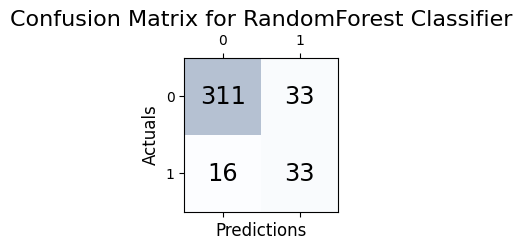

In [54]:
from sklearn.metrics import confusion_matrix
cm_RFC = confusion_matrix(y_test, y_predicted_RFC)
##plotting the confusion matrix

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_RFC, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_RFC.shape[0]):
    for j in range(cm_RFC.shape[1]):
        ax.text(x=j, y=i,s=cm_RFC[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix for RandomForest Classifier', fontsize=16)
plt.show()

**8.1.2. Classification Metrics**

In [55]:
classification_metrics_rfc= {
        "Accuracy": accuracy_score(y_test, y_predicted_RFC),
        "Precision": precision_score(y_test, y_predicted_RFC,average='weighted'),
        "Recall": recall_score(y_test, y_predicted_RFC,average='weighted'),
        "F1-score":f1_score(y_test, y_predicted_RFC,average='weighted')
    }

classification_metrics_rfc

{'Accuracy': 0.8753180661577609,
 'Precision': 0.8948300145512835,
 'Recall': 0.8753180661577609,
 'F1-score': 0.8829542589827257}

In [56]:
##classification report
report_rfc = classification_report(y_test, y_predicted_RFC, output_dict=True)
df_classification_report_RFC = pd.DataFrame(report_rfc).transpose()
print('clasification report:\n')
df_classification_report_RFC

clasification report:



,precision,recall,f1-score,support
0.0,0.951070,0.904070,0.926975,344.000000
1.0,0.500000,0.673469,0.573913,49.000000
accuracy,0.875318,0.875318,0.875318,0.875318
macro avg,0.725535,0.788770,0.750444,393.000000
weighted avg,0.894830,0.875318,0.882954,393.000000


**8.1.3. ROC-CURVE**

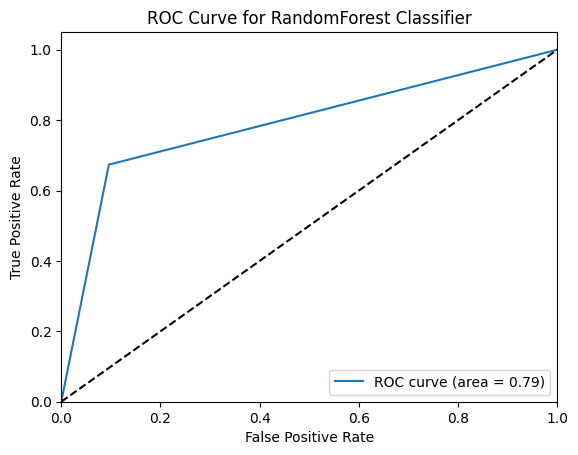

In [57]:
from sklearn.metrics import roc_curve,auc
fpr,tpr,_=roc_curve(y_test,y_predicted_RFC)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for RandomForest Classifier')
plt.legend(loc="lower right")
plt.show()

**8.1.4. Precision Recall Curve**

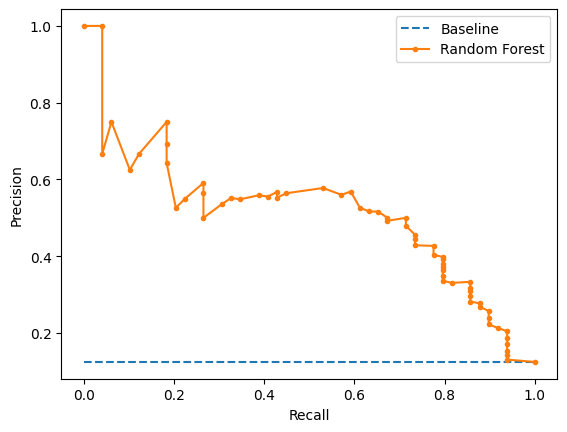

In [58]:
#P-R curve
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot
rfc_probs = model_RFC.predict_proba(X_test)
# keep probabilities for the positive outcome only
rfc_probs = rfc_probs[:, 1]
rfc_precision, rfc_recall, _ = precision_recall_curve(y_test, rfc_probs)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(rfc_recall, rfc_precision, marker='.', label='Random Forest')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**8.2 XGBOOST CLASSIFIER**

In [59]:



#import libraries
from xgboost import XGBClassifier
#Create model instance
bst=XGBClassifier(n_estimators=70,learning_rate=1,objective='binary:logistic')
#fit the model
bst.fit(X_train_sm,y_train_sm)

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [60]:
#Accuracy
bst.score(X_test,y_test)

0.8600508905852418

In [61]:
#testing the model
y_predicted_XGB=bst.predict(X_test)

**8.2.1. Confusion Matrix**

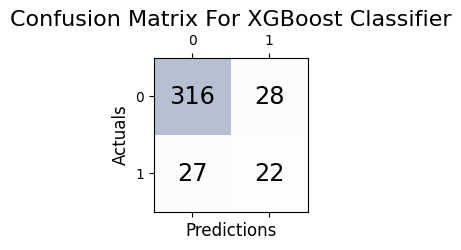

In [62]:
cm_XGB = confusion_matrix(y_test, y_predicted_XGB)
##plotting the confusion matrix

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_XGB, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_XGB.shape[0]):
    for j in range(cm_XGB.shape[1]):
        ax.text(x=j, y=i,s=cm_XGB[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix For XGBoost Classifier', fontsize=16)
plt.show()

**8.2.2. Classification Metrics**

In [63]:
classification_metrics_XGB= {
        "Accuracy": accuracy_score(y_test, y_predicted_XGB),
        "Precision": precision_score(y_test, y_predicted_XGB,average='weighted'),
        "Recall": recall_score(y_test, y_predicted_XGB,average='weighted'),
        "F1-score":f1_score(y_test, y_predicted_XGB,average='weighted')
    }

classification_metrics_XGB

{'Accuracy': 0.8600508905852418,
 'Precision': 0.8612755287502133,
 'Recall': 0.8600508905852418,
 'F1-score': 0.8606558490221279}

In [64]:
##classification report
report_xgb = classification_report(y_test, y_predicted_XGB, output_dict=True)
df_classification_report_XGB= pd.DataFrame(report_xgb).transpose()
print('clasification report:\n')
df_classification_report_XGB

clasification report:



,precision,recall,f1-score,support
0.0,0.921283,0.918605,0.919942,344.000000
1.0,0.440000,0.448980,0.444444,49.000000
accuracy,0.860051,0.860051,0.860051,0.860051
macro avg,0.680641,0.683792,0.682193,393.000000
weighted avg,0.861276,0.860051,0.860656,393.000000


**8.2.3. ROC-CURVE**

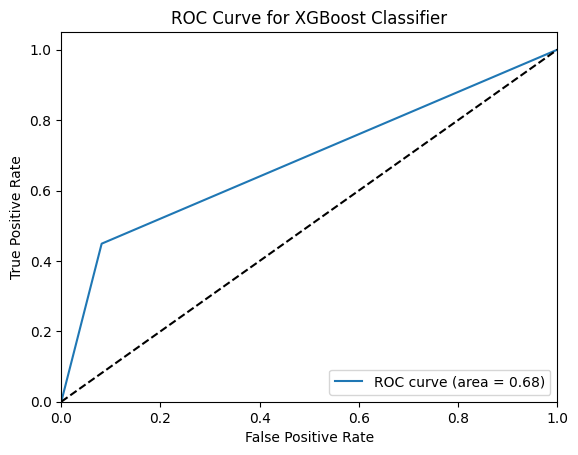

In [65]:
fpr,tpr,_=roc_curve(y_test,y_predicted_XGB)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost Classifier')
plt.legend(loc="lower right")
plt.show()

**8.2.4. Precision Recall Curve**

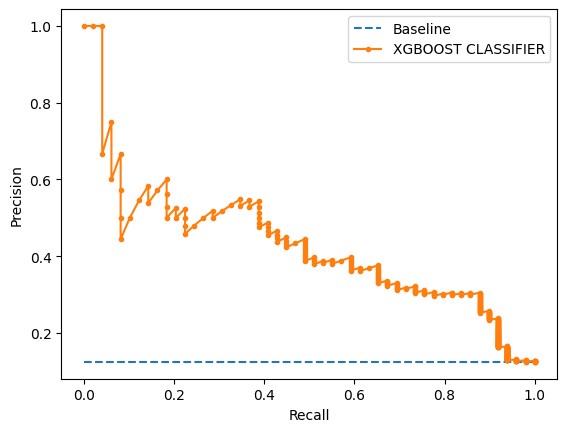

In [66]:
#P-R curve
XGB_probs = bst.predict_proba(X_test)
# keep probabilities for the positive outcome only
XGB_probs = XGB_probs[:, 1]
XGB_precision, XGB_recall, _ = precision_recall_curve(y_test, XGB_probs)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(XGB_recall, XGB_precision, marker='.', label='XGBOOST CLASSIFIER')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**8.3 K-NEAREST NEIGHBOR (KNN) CLASSIFIER**

In [67]:
from sklearn.neighbors import KNeighborsClassifier
#chose neighbours to be equal to 3
knn = KNeighborsClassifier(n_neighbors=3)
#fitting the model
knn.fit(X_train_sm, y_train_sm)

,n_neighbors,3
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [68]:
#Accuracy
knn.score(X_test,y_test)

0.7938931297709924

In [69]:
#testing the model
y_predicted_knn = knn.predict(X_test)

**8.3.1. Confusion Matrix**

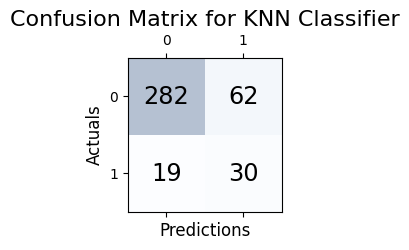

In [70]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test, y_predicted_knn)
##plotting the confusion matrix

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_knn, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        ax.text(x=j, y=i,s=cm_knn[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix for KNN Classifier', fontsize=16)
plt.show()

**8.3.2. Classification Metrics**

In [71]:
classification_metrics_knn= {
        "Accuracy": accuracy_score(y_test, y_predicted_knn),
        "Precision": precision_score(y_test, y_predicted_knn,average='weighted'),
        "Recall": recall_score(y_test, y_predicted_knn,average='weighted'),
        "F1-score":f1_score(y_test, y_predicted_knn,average='weighted')
    }
classification_metrics_knn

{'Accuracy': 0.7938931297709924,
 'Precision': 0.8607225830923142,
 'Recall': 0.7938931297709924,
 'F1-score': 0.8184505440961507}

In [72]:
##classification report
report_knn = classification_report(y_test, y_predicted_knn, output_dict=True)
df_classification_report_knn = pd.DataFrame(report_knn).transpose()
print('clasification report:\n')
df_classification_report_knn

clasification report:



,precision,recall,f1-score,support
0.0,0.936877,0.819767,0.874419,344.000000
1.0,0.326087,0.612245,0.425532,49.000000
accuracy,0.793893,0.793893,0.793893,0.793893
macro avg,0.631482,0.716006,0.649975,393.000000
weighted avg,0.860723,0.793893,0.818451,393.000000


**8.3.3. ROC-CURVE**

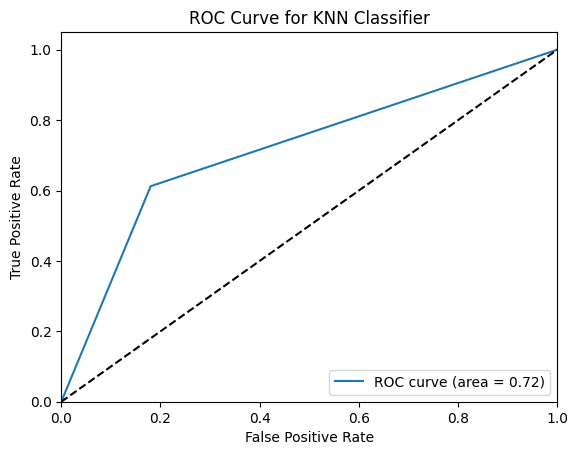

In [73]:
fpr,tpr,_=roc_curve(y_test,y_predicted_knn)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for KNN Classifier')
plt.legend(loc="lower right")
plt.show()

**8.3.4. Precision Recall Curve**

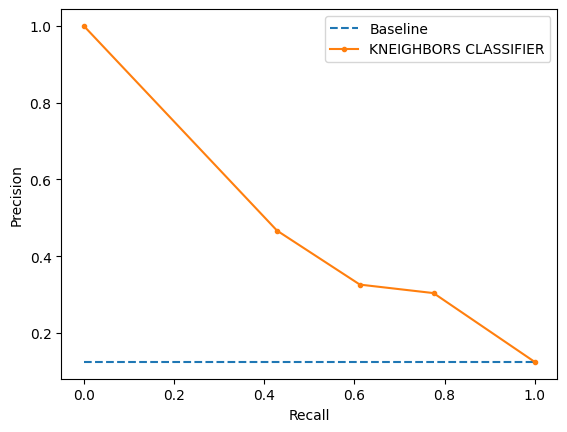

In [74]:
#P-R curve
knn_probs = knn.predict_proba(X_test)
# keep probabilities for the positive outcome only
knn_probs = knn_probs[:, 1]
knn_precision, knn_recall, _ = precision_recall_curve(y_test, knn_probs)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(knn_recall, knn_precision, marker='.', label='KNEIGHBORS CLASSIFIER')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

**8.4 SUPPORT VECTOR MACHINE (SVM) CLASSIFIER**

In [75]:
from sklearn import svm
#Create model instance
clf = svm.SVC(kernel='linear',probability=True)
#fit the model
clf.fit(X_train_sm, y_train_sm)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [76]:
#Accuracy
clf.score(X_test,y_test)

0.7531806615776081

In [77]:
#testing the model
y_predicted_svm = clf.predict(X_test)

**8.4.1. Confusion Matrix**

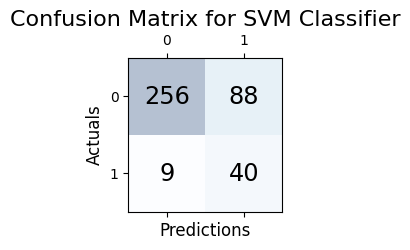

In [78]:
from sklearn.metrics import confusion_matrix
cm_svm = confusion_matrix(y_test, y_predicted_svm)
##plotting the confusion matrix

fig, ax = plt.subplots(figsize=(2,2))
ax.matshow(cm_svm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(x=j, y=i,s=cm_svm[i, j], va='center', ha='center', size='xx-large')

plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix for SVM Classifier', fontsize=16)
plt.show()

**8.4.2. Classification Metrics**

In [79]:
classification_metrics_svm= {
        "Accuracy": accuracy_score(y_test, y_predicted_svm),
        "Precision": precision_score(y_test, y_predicted_svm,average='weighted'),
        "Recall": recall_score(y_test, y_predicted_svm,average='weighted'),
        "F1-score":f1_score(y_test, y_predicted_svm,average='weighted')
    }
classification_metrics_svm

{'Accuracy': 0.7531806615776081,
 'Precision': 0.8845533871045177,
 'Recall': 0.7531806615776081,
 'F1-score': 0.7922530057079292}

In [80]:
##classification report
report_svm = classification_report(y_test, y_predicted_svm, output_dict=True)
df_classification_report_svm=pd.DataFrame(report_svm).transpose()
print('clasification report:\n')
df_classification_report_svm

clasification report:



,precision,recall,f1-score,support
0.0,0.966038,0.744186,0.840722,344.000000
1.0,0.312500,0.816327,0.451977,49.000000
accuracy,0.753181,0.753181,0.753181,0.753181
macro avg,0.639269,0.780256,0.646350,393.000000
weighted avg,0.884553,0.753181,0.792253,393.000000


**8.4.3. ROC-CURVE**

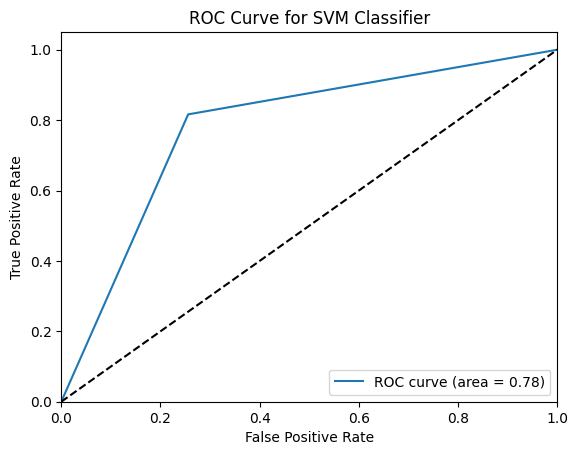

In [81]:
fpr,tpr,_=roc_curve(y_test,y_predicted_svm)
roc_auc=auc(fpr,tpr)
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

**8.4.4. Precision Recall Curve**

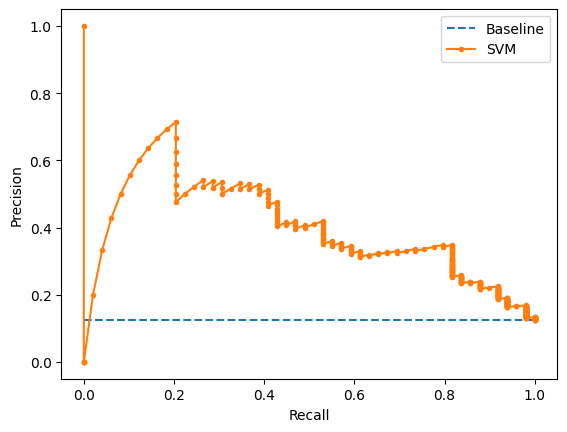

In [82]:
#P-R curve
clf_probs = clf.predict_proba(X_test)
# keep probabilities for the positive outcome only
clf_probs = clf_probs[:, 1]
clf_precision, clf_recall, _ = precision_recall_curve(y_test, clf_probs)
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='Baseline')
pyplot.plot(clf_recall, clf_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

## **9. Comparison Of Models**

**Creating dictionary of classification metrics of each Model**

In [83]:
classifiers_m= {
    "RandomForest Classifier": classification_metrics_rfc,
    "XGBoost Classifier": classification_metrics_XGB,
    "K-Nearest Neighbors": classification_metrics_knn,
    "Support Vector Machine": classification_metrics_svm
}


In [84]:
classm_df = pd.DataFrame.from_dict(classifiers_m, orient='index')
classm_df

,Accuracy,Precision,Recall,F1-score
RandomForest Classifier,0.875318,0.894830,0.875318,0.882954
XGBoost Classifier,0.860051,0.861276,0.860051,0.860656
K-Nearest Neighbors,0.793893,0.860723,0.793893,0.818451
Support Vector Machine,0.753181,0.884553,0.753181,0.792253


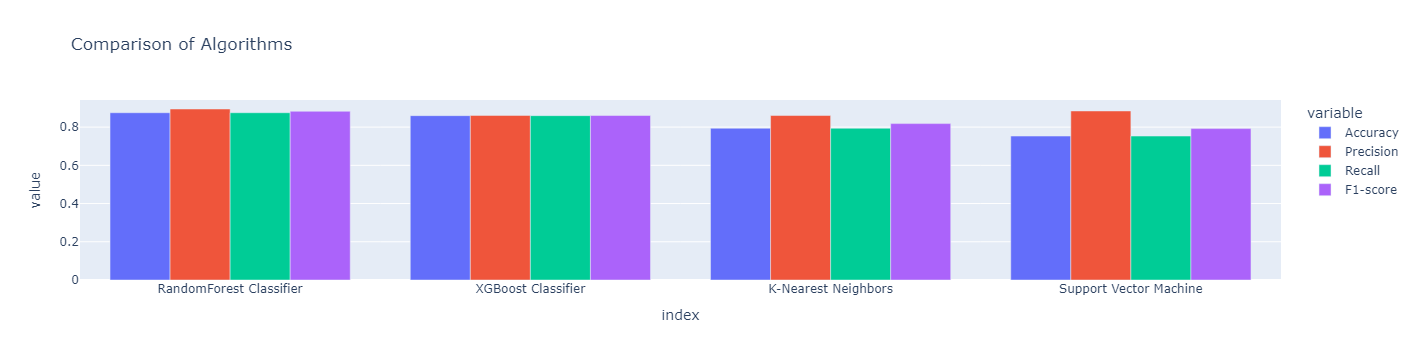

In [85]:

import plotly.express as px
fig = px.bar(classm_df,title="Comparison of Algorithms",barmode='group')
fig.show()

## RandomForest Classifier is the best fit Model.